# Polynomial Regression

For a polynomial regression, we fit the following polynomial to our data:

$$y_{i} = \beta_{0} + x_{i}\beta_{1}+ x_{i}^2 \beta_{2}+...+ x_{i}^m \beta_{m},$$
$i=1,2,...,n$

We use the same method as in multiple linear regression by treating $x_{i}, x_{i}^{2}, ...x_{i}^{m}$ as being distinct independent variables in a multiple regression model.

$$
\left(\begin{array}{c} 
y_{1} \\
y_{2} \\
.     \\
.     \\
.     \\
y_{n}
\end{array}\right)
=
\left(\begin{array}{ccccccc} 
1 & x_{1} & x_{1}^2 &.&.&.& x_{1}^m\\ 
1 & x_{2} & x_{2}^2 &.&.&.& x_{2}^m\\
. & . & . &.&.&.& .\\
. & . & . &.&.&.& .\\
. & . & . &.&.&.& .\\
1 & x_{n} & x_{n}^2 &.&.&.& x_{n}^m
\end{array}\right)
\left(\begin{array}{c} 
\beta_{1} \\
\beta_{2} \\
.     \\
.     \\
.     \\
\beta_{n}
\end{array}\right)
$$ 

which can be written as:
$$Y = \beta^{T}X,$$
Given a feature $x$, we need to transform it to a $1, x, x^{2},...,x^{m}$, we do the same for other features if they exist. To do this we would employ the following functions: 

In [15]:
def poly_feats(input_values, degree):
    if degree==1:
        if 1 not in input_values:
            result = input_values.insert(0,1)
        result=input_values
        return result
    elif degree > 1:
        new_result=[]
        result = poly_feats(input_values, degree-1)
        new_result.extend(result)
        for item in input_values:
            for p_item in result:
                res=item*p_item
                if (res not in result) and (res not in new_result):
                    new_result.append(res)
        return new_result
    

In [163]:
def get_poly_feats(X, degree):
    import pandas as pd
    df = pd.DataFrame(X)
    result = {}
    for index, row in df.iterrows():
        result[index] = poly_feats(row.tolist(), degree)
    return result

To keep things simple, let's generate some random data set 

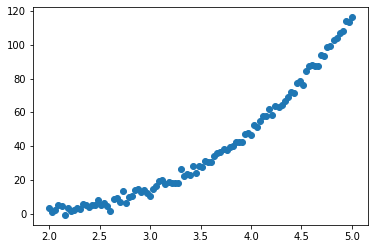

In [166]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
x = np.linspace(2, 5, 100)
y = x - 3 * (x ** 2) + 1.5 * (x ** 3) + np.random.normal(-2, 2, 100)
plt.scatter(x,y)
plt.show()

Let's try to fit a straight line to this, we know it won't be correct, but ley's try it out to see.

In [141]:
class LinReg2():
    """ Multiple Linear regression class for calculating the
    coefficients of a data set.
    Attributes: intercept_   
    Methods: fit, predict, score
    """
    
    def __init__(self):
        self.B = []
        
    
    def fit(self,X, Y, alpha=0.01, iterations=100000):
        
        """Function to calculate the coefficients of a data set.
        Args: X, Y, alpha: learning rate, iterations
        Returns: None
        """
        import numpy as np
        m = len(Y)
        self.B = np.zeros(X.shape[1])
        for iteration in range(iterations):
            # Hypothesis Values
            h = X.dot(self.B)
            # Difference b/w Hypothesis and Actual Y
            loss = h - Y
            # Gradient Calculation
            gradient = X.T.dot(loss) / m
            # Changing Values of B using Gradient
            self.B = self.B - alpha * gradient
            

    def predict(self, X):
        """Function to predict target given label.
        Args: X
        Returns Y """
        Y = X.dot(self.B)
        return Y
        
    def score(self, X, Y):
        """Function to calculate the R^2 score.
        Args: X, Y
        Returns: r2
        """
        import numpy as np
        Y_pred = self.predict(X)
        ssr = np.sum((Y - Y_pred)**2)
        sst = np.sum((Y - Y.mean())**2)
        r2 = 1 - ssr/sst
        return r2
        

In [167]:
m = len(x)
x0 = np.ones(m)
X = np.array([x0, x]).T
Y = np.array(y)

In [168]:
Lin_model = LinReg2()

In [169]:
Lin_model.fit(X,Y, alpha=0.0001)

In [170]:
Y_pred = Lin_model.predict(X)


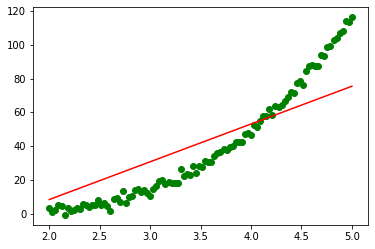

In [171]:
plt.scatter(x,y, color='g', label='Data')
plt.plot(X[:,1], Y_pred, '-r', label='Linear regression')
plt.legend
plt.show()

Now lets fit a cubic function, first we need to transform our feature, $x$ 

In [190]:
X1= get_poly_feats(x, 2)
X1 = pd.DataFrame(X1).T
X1 = np.array(X1)

In [191]:
 print('Before transformation=', X[0])
print('After transformation=', X1[0])

Before transformation= [1. 2.]
After transformation= [1. 2. 4.]


In [192]:
X1.shape[1]

3

We are now ready to fit this data using our linear model

In [193]:
Lin_mode2 = LinReg2()

In [194]:
Lin_mode2.fit(X1, Y)

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract


In [187]:
Y_pred2 = Lin_mode2.predict(X1)

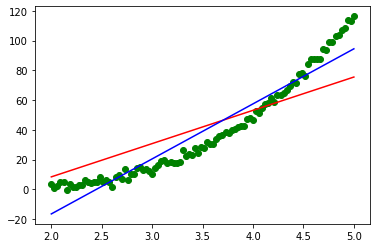

In [189]:
plt.scatter(x,y, color='g', label='Data')
plt.plot(X[:,1], Y_pred, '-r', label='Linear regression')
plt.plot(X1[:,1], Y_pred2, '-b', label='Polynomial regression')
plt.legend
plt.show()

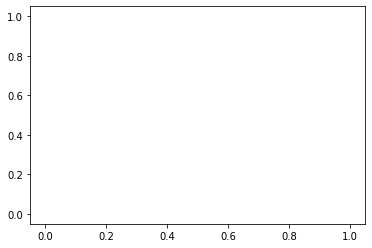

In [154]:
plt.plot(X1, Y_pred2, '-b', label='Polynomial regression')
plt.legend
plt.show()

In [155]:
Y_pred2

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])